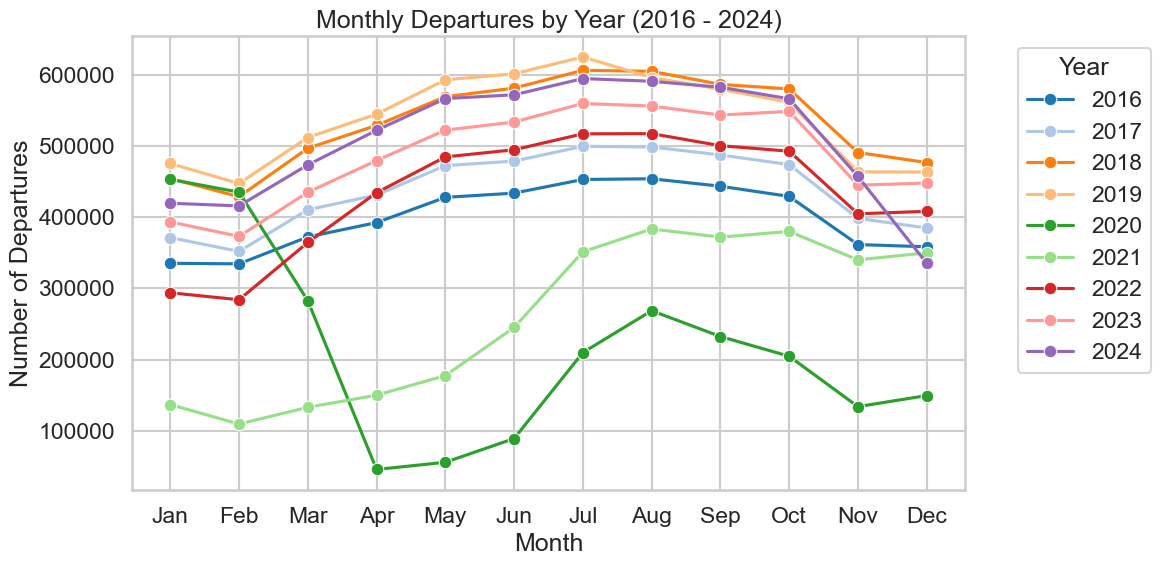

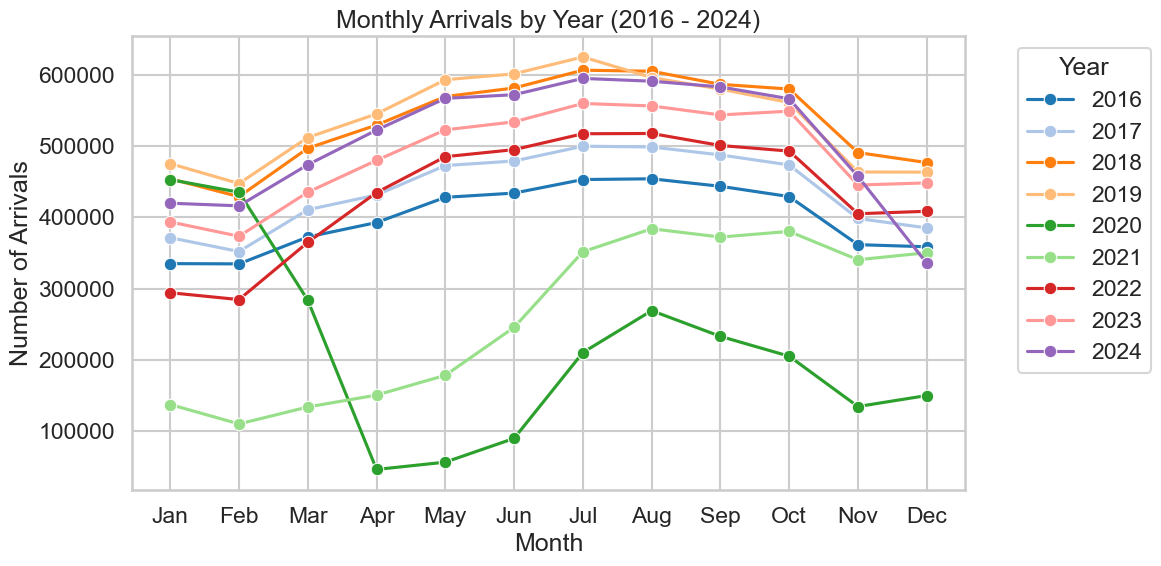


Yearly traffic by airport category (business and leisure only):
    YEAR  category  FLT_DEP_1  FLT_ARR_1
0   2016  business     697801     697885
1   2016   leisure     669407     669241
2   2017  business     712123     712192
3   2017   leisure     667886     667797
4   2018  business     845121     845429
5   2018   leisure     707758     707688
6   2019  business     849587     849642
7   2019   leisure     716032     715902
8   2020  business     332828     332897
9   2020   leisure     270452     270382
10  2021  business     340705     340695
11  2021   leisure     327194     327183
12  2022  business     657495     657580
13  2022   leisure     552081     552015
14  2023  business     759415     759555
15  2023   leisure     645262     645440
16  2024  business     760486     760537
17  2024   leisure     675818     675949


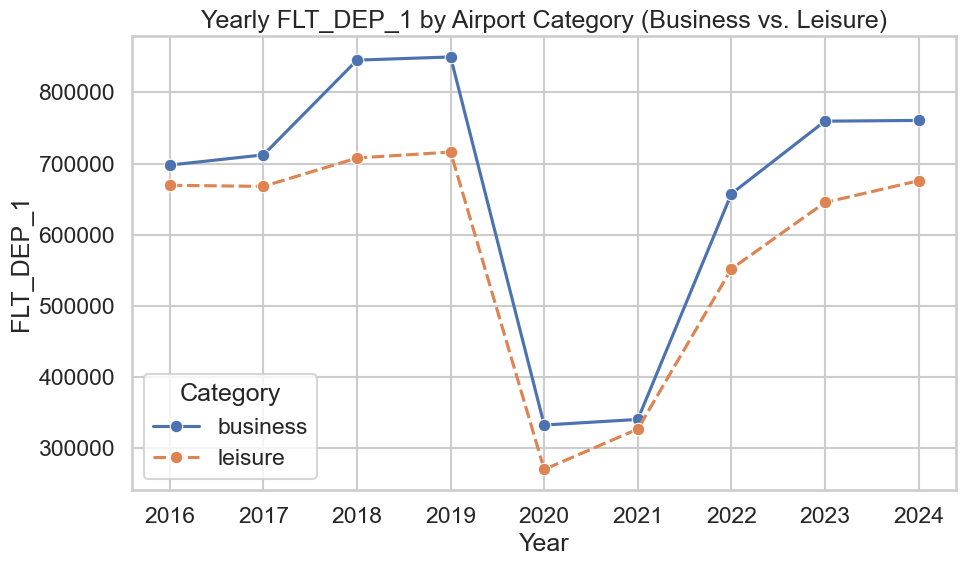

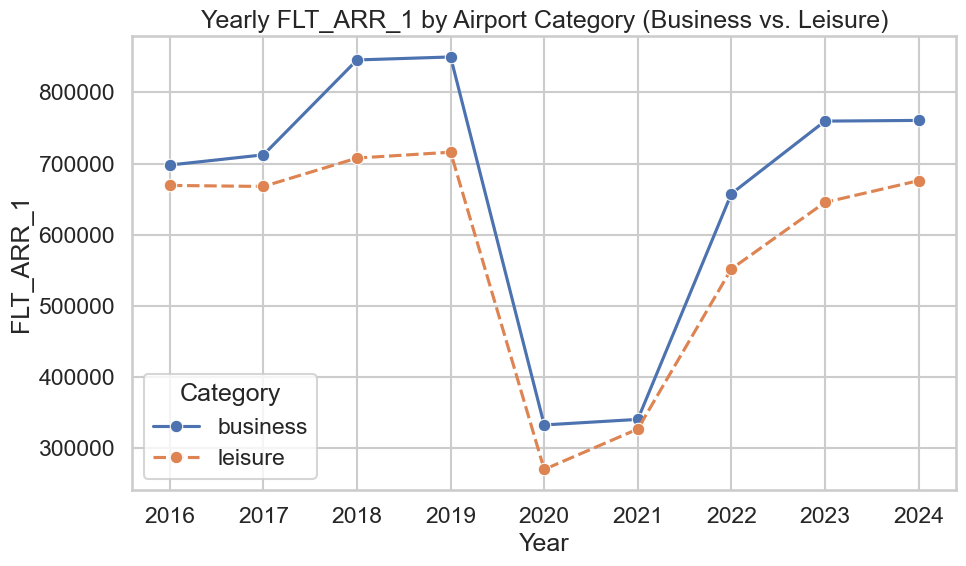


Recovery ratios (post-COVID vs. pre-COVID) by Airport Name:
                APT_NAME  FLT_DEP_1_baseline  FLT_ARR_1_baseline  \
0               Aberdeen           73.815068           73.539726   
1               Alicante          129.976027          129.978082   
2   Amsterdam - Schiphol          691.135524          690.959617   
3                 Athens          275.069131          275.202601   
4              Barcelona          448.872690          448.744011   
..                   ...                 ...                 ...   
86                Vienna          349.078713          349.058864   
87               Vilnius           64.038356           64.112329   
88    Warszawa - Chopina          241.848734          241.559206   
89                Zagreb           59.564480           59.595023   
90                Zürich          365.231348          365.062971   

    FLT_DEP_1_post  FLT_ARR_1_post  dep_recovery_ratio  arr_recovery_ratio  
0        48.504018       48.620161           

/var/folders/kr/prbrsy4j3lnfm0f8nqc3sncr0000gn/T/ipykernel_74774/852991188.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=recovery_sel, x="APT_NAME", y=metric, palette="coolwarm")


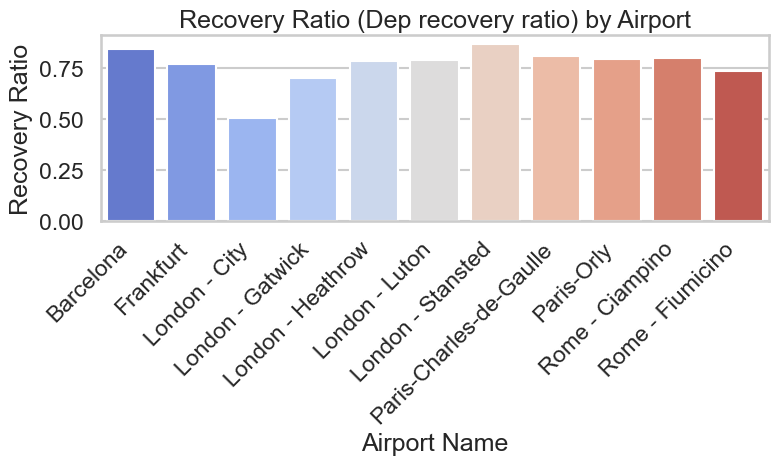

/var/folders/kr/prbrsy4j3lnfm0f8nqc3sncr0000gn/T/ipykernel_74774/852991188.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=recovery_sel, x="APT_NAME", y=metric, palette="coolwarm")


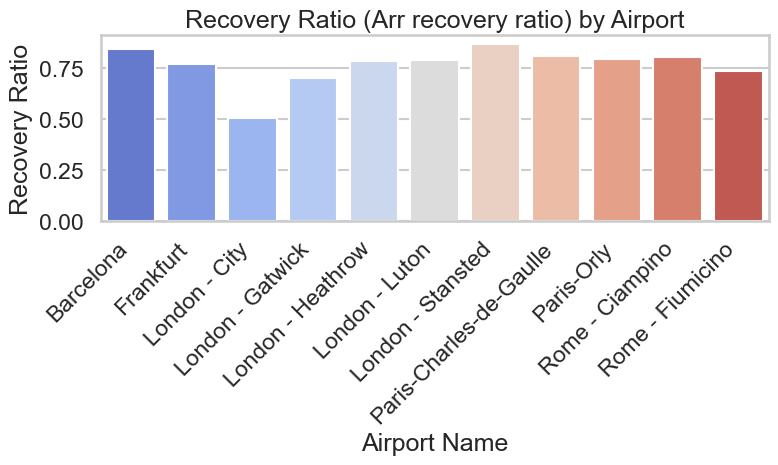

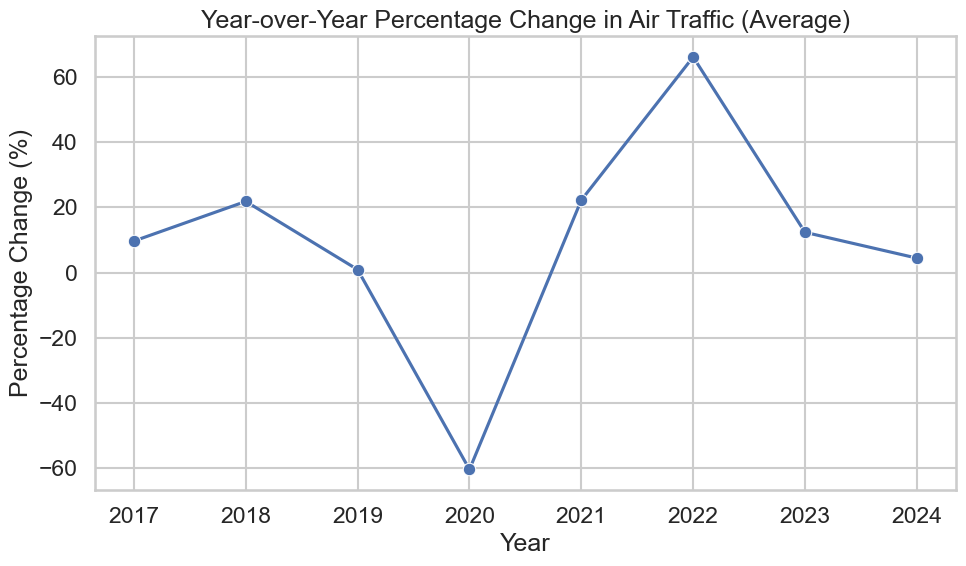


Pre-COVID (2016-2019) average traffic (sum of yearly totals):
FLT_DEP_1    5733649.5
FLT_ARR_1    5734685.5
dtype: float64

Latest year (2024) traffic totals:
      FLT_DEP_1  FLT_ARR_1
YEAR                      
2024    6099818    6103100

Recovery ratio for Departures (2024 vs. pre-COVID): 1.06
Recovery ratio for Arrivals (2024 vs. pre-COVID): 1.06


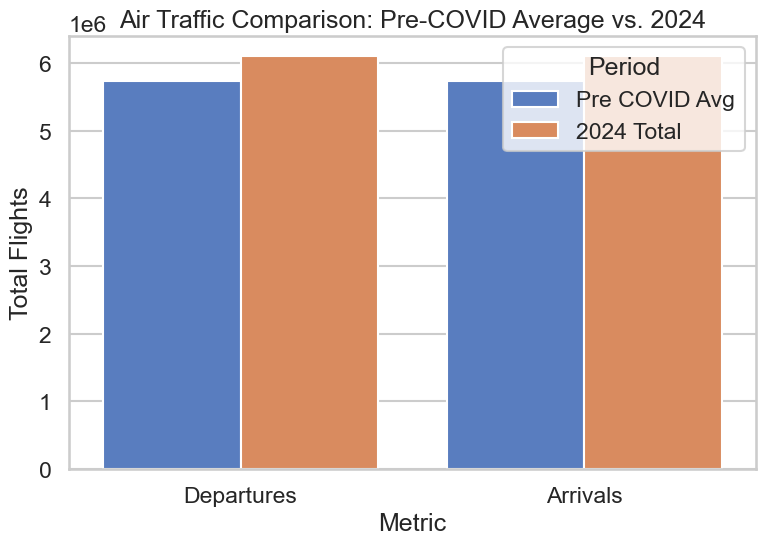

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn theme for a polished look.
sns.set_theme(style="whitegrid", context="talk")

# ========================
# 1. Load and Prepare the Data
# ========================
df = pd.read_csv("airport_traffic_2016_2024_cleaned.csv")

# Ensure YEAR is numeric.
df["YEAR"] = pd.to_numeric(df["YEAR"], errors="coerce")

# Group the data by YEAR and MONTH_NUM to aggregate the departures and arrivals.
monthly_yearly_stats = df.groupby(["YEAR", "MONTH_NUM"])[["FLT_DEP_1", "FLT_ARR_1"]].sum().reset_index()

# Define the desired years to include in the chart.
desired_years = list(range(2016, 2025))  # This creates a list [2016, 2017, ..., 2024]

# Create a complete MultiIndex (for every year in desired_years and every month 1 to 12)
full_index = pd.MultiIndex.from_product(
    [desired_years, range(1, 13)],
    names=["YEAR", "MONTH_NUM"]
)

# Reindex the grouped DataFrame with the full calendar.
monthly_yearly_stats = (
    monthly_yearly_stats
    .set_index(["YEAR", "MONTH_NUM"])
    .reindex(full_index)
    .reset_index()
)

# Fill missing values with 0 so each (YEAR, MONTH_NUM) has a value.
monthly_yearly_stats[["FLT_DEP_1", "FLT_ARR_1"]] = monthly_yearly_stats[["FLT_DEP_1", "FLT_ARR_1"]].fillna(0)

# For display on the x-axis, define month labels.
order_months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# ========================
# 2. Plot the Line Charts for All Years
# ========================

# --- Plot for Departures ---
plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_yearly_stats,
    x="MONTH_NUM",
    y="FLT_DEP_1",
    hue="YEAR",
    palette="tab20",
    hue_order=desired_years,  # Forces legend to include all years from 2016 to 2024.
    marker="o"
)
plt.title("Monthly Departures by Year (2016 - 2024)")
plt.xlabel("Month")
plt.ylabel("Number of Departures")
plt.xticks(range(1, 13), order_months)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# --- Plot for Arrivals ---
plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_yearly_stats,
    x="MONTH_NUM",
    y="FLT_ARR_1",
    hue="YEAR",
    palette="tab20",
    hue_order=desired_years,
    marker="o"
)
plt.title("Monthly Arrivals by Year (2016 - 2024)")
plt.xlabel("Month")
plt.ylabel("Number of Arrivals")
plt.xticks(range(1, 13), order_months)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()





# 2.2: Has travel demand shifted from business to leisure-focused airports over time?
leisure_airports = ["Barcelona", "Paris", "Rome"]
business_airports = ["London", "Frankfurt"]

def categorize_airport(apt_name):
    if any(leisure.lower() in apt_name.lower() for leisure in leisure_airports):
        return "leisure"
    elif any(business.lower() in apt_name.lower() for business in business_airports):
        return "business"
    else:
        return "other"

df["category"] = df["APT_NAME"].apply(categorize_airport)
# Only keep rows that are business or leisure
df_filtered = df[df["category"].isin(["business", "leisure"])]

yearly_category = df_filtered.groupby(["YEAR", "category"])[["FLT_DEP_1", "FLT_ARR_1"]].sum().reset_index()
print("\nYearly traffic by airport category (business and leisure only):")
print(yearly_category)

for metric in ["FLT_DEP_1", "FLT_ARR_1"]:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=yearly_category, x="YEAR", y=metric, hue="category",
                 marker="o", style="category")
    plt.title(f"Yearly {metric} by Airport Category (Business vs. Leisure)")
    plt.xlabel("Year")
    plt.ylabel(metric)
    plt.legend(title="Category")
    plt.tight_layout()
    plt.show()


# 2.3: Do major tourist destinations show higher-than-average recovery compared to business hubs?
# Baseline (pre-COVID: 2016-2019) and post-COVID (2021+).
baseline = df[df["YEAR"].isin([2016, 2017, 2018, 2019])]
baseline_avg = baseline.groupby("APT_NAME")[["FLT_DEP_1", "FLT_ARR_1"]].mean().reset_index()

post_covid = df[df["YEAR"] >= 2021]
post_avg = post_covid.groupby("APT_NAME")[["FLT_DEP_1", "FLT_ARR_1"]].mean().reset_index()

# Merge and compute recovery ratios
recovery = pd.merge(baseline_avg, post_avg, on="APT_NAME", suffixes=("_baseline", "_post"))
recovery["dep_recovery_ratio"] = recovery["FLT_DEP_1_post"] / recovery["FLT_DEP_1_baseline"]
recovery["arr_recovery_ratio"] = recovery["FLT_ARR_1_post"] / recovery["FLT_ARR_1_baseline"]
print("\nRecovery ratios (post-COVID vs. pre-COVID) by Airport Name:")
print(recovery)

selected_airports = ["Barcelona", "Paris", "Rome", "London", "Frankfurt"]
recovery_sel = recovery[recovery["APT_NAME"].str.contains("|".join(selected_airports), case=False)]
print("\nRecovery ratios for selected airports:")
print(recovery_sel)

for metric in ["dep_recovery_ratio", "arr_recovery_ratio"]:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=recovery_sel, x="APT_NAME", y=metric, palette="coolwarm")
    plt.title(f"Recovery Ratio ({metric.replace('_', ' ').capitalize()}) by Airport")
    plt.xlabel("Airport Name")
    plt.ylabel("Recovery Ratio")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


# ========================
# 3. Economic & Policy Impact on Air Traffic
# ========================

# 3.1: Impact of global events on air traffic (Year-over-Year Percentage Change)
sns.set_theme(style="whitegrid", context="talk")

# Compute total yearly traffic
yearly_traffic = df.groupby("YEAR")[["FLT_DEP_1", "FLT_ARR_1"]].sum().reset_index()

# Calculate percentage changes for departures and arrivals
yearly_traffic["dep_pct_change"] = yearly_traffic["FLT_DEP_1"].pct_change() * 100
yearly_traffic["arr_pct_change"] = yearly_traffic["FLT_ARR_1"].pct_change() * 100

# Compute the average percentage change. (Ignore the first year NaN.)
yearly_traffic["avg_pct_change"] = (yearly_traffic["dep_pct_change"] + yearly_traffic["arr_pct_change"]) / 2

# Plot the average percentage change
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_traffic, x="YEAR", y="avg_pct_change", marker="o")
plt.title("Year-over-Year Percentage Change in Air Traffic (Average)")
plt.xlabel("Year")
plt.ylabel("Percentage Change (%)")
plt.tight_layout()
plt.show()


# 3.3: Did COVID-19 travel restrictions permanently alter air traffic flows?
pre_covid = df[df["YEAR"].isin([2016, 2017, 2018, 2019])].groupby("YEAR")[["FLT_DEP_1", "FLT_ARR_1"]].sum().mean()
latest = df[df["YEAR"] == 2024].groupby("YEAR")[["FLT_DEP_1", "FLT_ARR_1"]].sum()

print("\nPre-COVID (2016-2019) average traffic (sum of yearly totals):")
print(pre_covid)
print("\nLatest year (2024) traffic totals:")
print(latest)

if not latest.empty:
    ratio_dep = latest["FLT_DEP_1"].values[0] / pre_covid["FLT_DEP_1"]
    ratio_arr = latest["FLT_ARR_1"].values[0] / pre_covid["FLT_ARR_1"]
    print(f"\nRecovery ratio for Departures (2024 vs. pre-COVID): {ratio_dep:.2f}")
    print(f"Recovery ratio for Arrivals (2024 vs. pre-COVID): {ratio_arr:.2f}")
else:
    print("\nNo data for the year 2024 was found in the dataset.")

# Visualization for 3.3: Bar chart comparing Pre-COVID average vs. 2024 totals
if not latest.empty:
    comparison = pd.DataFrame({
        "Metric": ["Departures", "Arrivals"],
        "Pre COVID Avg": [pre_covid["FLT_DEP_1"], pre_covid["FLT_ARR_1"]],
        "2024 Total": [latest["FLT_DEP_1"].values[0], latest["FLT_ARR_1"].values[0]]
    })
    comparison_melted = comparison.melt(id_vars="Metric", var_name="Period", value_name="Value")

    plt.figure(figsize=(8,6))
    sns.barplot(data=comparison_melted, x="Metric", y="Value", hue="Period", palette="muted")
    plt.title("Air Traffic Comparison: Pre-COVID Average vs. 2024")
    plt.ylabel("Total Flights")
    plt.tight_layout()
    plt.show()

# ========================
# End of Analysis
# ========================
